In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.20.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

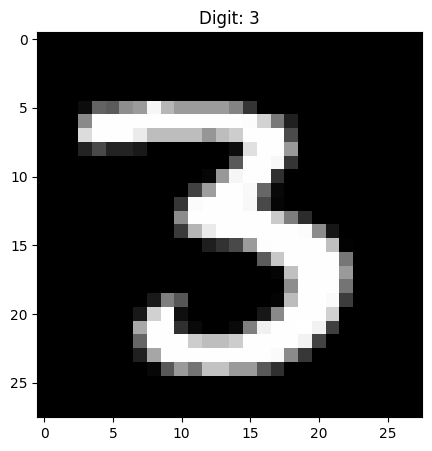

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[12], cmap='gray')
plt.title(f"Digit: {y_train[12]}")
plt.show()

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 32, activation='sigmoid'),
    tf.keras.layers.Dense(units = 32, activation='sigmoid'),
    tf.keras.layers.Dense(units = 10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
y_train.shape

(60000,)

In [9]:
# First we have to cimpile our model...

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.8324 - loss: 0.7498
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.9283 - loss: 0.2566
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9447 - loss: 0.1948
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.9531 - loss: 0.1628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9592 - loss: 0.1411
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.9640 - loss: 0.1251
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9675 - loss: 0.1129
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.9703 - loss: 0.1023
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9730 - loss: 0.0941
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.9751 - loss: 0.0865


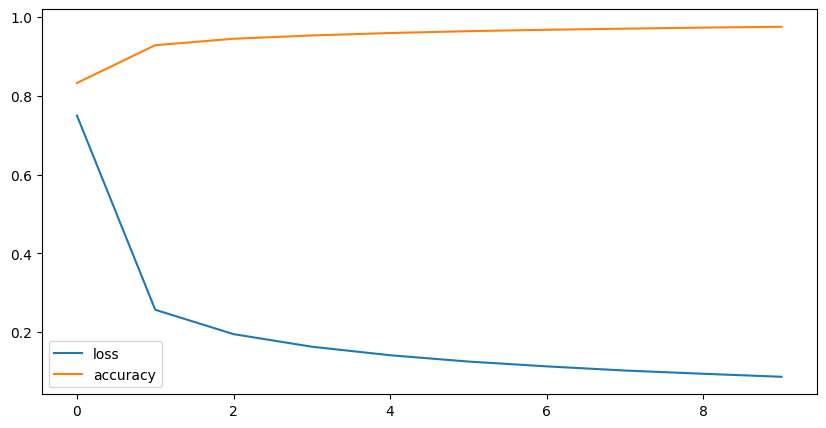

In [11]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy') 
plt.legend()
plt.show() 

In [12]:
#Loss and accuracy 
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9648 - loss: 0.1208


[0.12077420949935913, 0.9648000001907349]

In [13]:
#SAVING MODEL
#model.save('./digit_net.keras', overwrite=False)

In [14]:
#LOAD MODEL

#loaded_model = tf.keras.models.load_model('./digit_net.keras')
#loaded_model.evaluate(x_test, y_test)